# PAPER, SCISSOR, ROCK

The dataset consists of three classes and 2188 images. In the following step we analysed the dataset.

In [47]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.models import Sequential


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/rockpaperscissors/README_rpc-cv-images.txt
/kaggle/input/rockpaperscissors/rps-cv-images/README_rpc-cv-images.txt
/kaggle/input/rockpaperscissors/rps-cv-images/paper/kVKp9kJji4urjoMs.png
/kaggle/input/rockpaperscissors/rps-cv-images/paper/JUn3VuVCoOKC5Nv2.png
/kaggle/input/rockpaperscissors/rps-cv-images/paper/JlMP0YH6vhxWRMZz.png
/kaggle/input/rockpaperscissors/rps-cv-images/paper/y2auZRkrUIi0wvd2.png
/kaggle/input/rockpaperscissors/rps-cv-images/paper/Qx31hf6YWyFs6Mu7.png
/kaggle/input/rockpaperscissors/rps-cv-images/paper/2tDgPZGqbrw95j39.png
/kaggle/input/rockpaperscissors/rps-cv-images/paper/v1b7FBFD4ZbLJnhB.png
/kaggle/input/rockpaperscissors/rps-cv-images/paper/B3dlyiRDulDJWOsW.png
/kaggle/input/rockpaperscissors/rps-cv-images/paper/Ht08RX3DQCSdl9Sy.png
/kaggle/input/rockpaperscissors/rps-cv-images/paper/vHbB53ZFtZoNcvAM.png
/kaggle/input/rockpaperscissors/rps-cv-images/paper/n5NXfZTRonR4iOr0.png
/kaggle/input/rockpaperscissors/rps-cv-images/paper/9v75qnx8zdeAAOq6.

/kaggle/input/rockpaperscissors/rps-cv-images/rock/bC8Fki1Na2rRSlBG.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/7gcPqW9meL8zJHFF.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/5nKDkVzIMQWmtReM.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/RsBNa42PCliwNPQS.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/FqRqtazi3LD2vwsr.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/TgCDIOp6r8sKduvT.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/hfvXIbr96w55MAIz.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/W502bu3C93KtmDol.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/z2NDPC5oc02bXnnK.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/XNzFnFkneYMqJQOF.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/srlcv9vYJ9c9OUsC.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/p8g7qteM8iFK1Mdp.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/esqqaIq6wKOr8EK6.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/yC1FoVJ7cUxIE

/kaggle/input/rockpaperscissors/scissors/wJNyEIqVDFH8bx5h.png
/kaggle/input/rockpaperscissors/scissors/GgA8wrylOr4pvJhZ.png
/kaggle/input/rockpaperscissors/scissors/JSDICtLrQIEXhPy5.png
/kaggle/input/rockpaperscissors/scissors/BtUfOjTzw9EEvNHO.png
/kaggle/input/rockpaperscissors/scissors/FoYWUBXBw6qO7y0f.png
/kaggle/input/rockpaperscissors/scissors/vcEwRcuUMQ89i8on.png
/kaggle/input/rockpaperscissors/scissors/uJ286TPihhYw3Y3S.png
/kaggle/input/rockpaperscissors/scissors/R27mU9zJCmv8wi1o.png
/kaggle/input/rockpaperscissors/scissors/FSQhfK1gcYqm4O4W.png
/kaggle/input/rockpaperscissors/scissors/2vDaPrc35RGC8nvM.png
/kaggle/input/rockpaperscissors/scissors/Ty7ti2YUZ4XJcaOk.png
/kaggle/input/rockpaperscissors/scissors/J06aYYcl79xoBD0g.png
/kaggle/input/rockpaperscissors/scissors/mViP022ujNQr6UX1.png
/kaggle/input/rockpaperscissors/scissors/P3sJVlVAylvpky7E.png
/kaggle/input/rockpaperscissors/scissors/KfZNOowxVhhRLrza.png
/kaggle/input/rockpaperscissors/scissors/AoGoNngxM4z3CboT.png
/kaggle/

## View first Image

In the following step we analysed the first image and printed the size to the console. 

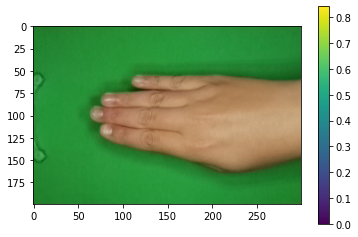

(200, 300, 3)


In [48]:
# show images
img_path = "/kaggle/input/rockpaperscissors/rps-cv-images/paper/kVKp9kJji4urjoMs.png"
img = mpimg.imread(img_path)

# show first image
plt.figure()
plt.imshow(img)
plt.colorbar()
plt.grid(False)
plt.show()

print(img.shape)

## Split Dataset in Train, Test and Validation

We preprocessed the images and split them in test, training and validation. Test and Validation is used to train the model. And with the testdataset we evaluated the model.

In [70]:
data_dir = "/kaggle/input/rockpaperscissors/rps-cv-images/"

batch_size = 32 # hyperparameter to change!!
img_height = 200
img_width = 300

print("Train:")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

print("Validation:")
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

print("Test:")
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Train:
Found 2188 files belonging to 3 classes.
Using 1751 files for training.
Validation:
Found 2188 files belonging to 3 classes.
Using 437 files for validation.
Test:
Found 2188 files belonging to 3 classes.
Using 656 files for validation.


Set and print the classification classes of our dataset.

In [50]:
class_names = train_ds.class_names
class_length = len(class_names)

print(class_names)
print(class_length)

['paper', 'rock', 'scissors']
3


### Autotune

We make sure to use buffered prefetching so we can yield data from disk without having I/O become blocking. These are two important methods usefull when loading data.

train_ds/vald_ds.cache() keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If the dataset is too large to fit into memory, it' also possible to use this method to create a performant on-disk cache.

train_ds/vald_ds.prefetch() overlaps data preprocessing and model execution while training.

In [51]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Extract Labels from Validation Dataset

Using a for loop to extract the right lables for the validation data to use them later in the confusion matrix. 

In [53]:
labels = []
img_img = iter(val_ds)
for x in iter(val_ds):
    image_batch, labels_batch = x
    l = labels_batch.numpy()
    labels.extend(l)
print(labels)

[2, 1, 1, 0, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 1, 1, 1, 2, 0, 2, 0, 1, 2, 0, 2, 0, 2, 2, 1, 2, 1, 2, 1, 2, 0, 1, 2, 2, 1, 2, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1, 0, 0, 2, 2, 1, 1, 0, 2, 2, 1, 2, 2, 0, 2, 2, 0, 1, 2, 1, 0, 0, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 1, 1, 2, 0, 0, 1, 1, 1, 2, 0, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 2, 0, 2, 1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 1, 1, 1, 1, 2, 1, 0, 2, 0, 2, 1, 0, 0, 2, 2, 1, 2, 2, 0, 1, 2, 0, 0, 1, 0, 0, 2, 1, 2, 0, 1, 0, 0, 0, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 0, 2, 0, 1, 1, 2, 0, 2, 1, 0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 1, 2, 1, 0, 0, 2, 0, 2, 2, 2, 1, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 0, 2, 0, 0, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 0, 2, 0, 2, 2, 0, 0, 1, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 0, 2, 2, 0, 1, 0, 0, 2, 1, 1, 2, 1, 

## Define Model

The Modell consists of three kernels with a MaxPooling Layer each. There is a fully connected Layer with 128 Neurons on the flattened vector (activated with relu). The next Layer is fully connected to the actually output Neurons (our classes). 
We tried different approachs it this was the one with the best solution.


In [68]:
num_classes = class_length

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Try Different hyperparameters

first version with a normal optimizer ('adam') and standard learning_rate. (aprox. 0.9542)

In [71]:
# compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# summary
model.summary()

# run 
epochs_count=3

history = model.fit(
  train_ds,
  validation_data=(val_ds),
  epochs=epochs_count
)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_6 (Rescaling)      (None, 200, 300, 3)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 200, 300, 16)      448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 100, 150, 16)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 100, 150, 32)      4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 50, 75, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 50, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 25, 37, 64)       

### learning_rate improving

In this version we tried to find the optimal hyperparameter *learning_rate*:
With a learning_rate of 0.01 only a accuracy of aprox. 30% is reached. With a learning_rate of 0.001 a accuracy of prox. 96%.

In [62]:
# opt = keras.optimizers.Adam(learning_rate=0.01)
opt = keras.optimizers.Adam(learning_rate=0.001)

# compile
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# summary
model.summary()

# run 
epochs_count=3

history = model.fit(
  train_ds,
  validation_data=(val_ds),
  epochs=epochs_count
)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_5 (Rescaling)      (None, 200, 300, 3)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 200, 300, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 100, 150, 16)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 100, 150, 32)      4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 50, 75, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 50, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 25, 37, 64)       

## Plot Loss-Function and Accuracy-Function

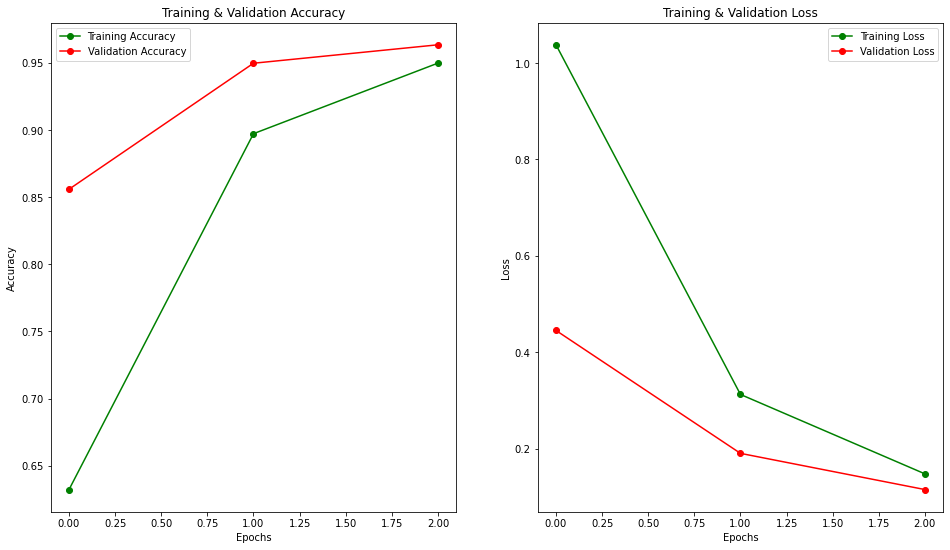

In [63]:
# validate

epochs = [i for i in range(epochs_count)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

## Print the classification report

In [75]:
predictions = model.predict_classes(val_ds)
print(classification_report(labels, predictions, target_names = class_names))

              precision    recall  f1-score   support

       paper       0.34      0.32      0.33       139
        rock       0.41      0.41      0.41       158
    scissors       0.32      0.34      0.33       140

    accuracy                           0.36       437
   macro avg       0.36      0.36      0.36       437
weighted avg       0.36      0.36      0.36       437



## Print Confusion Matrix

In [78]:
cm = confusion_matrix(labels,predictions)
cm = pd.DataFrame(cm , index = [i for i in range(3)] , columns = [i for i in range(3)])
print(cm)
print()
print('labels', class_names)

    0   1   2
0  45  43  51
1  45  64  49
2  41  51  48

labels ['paper', 'rock', 'scissors']


## Print Heatmap

Print Confusion matrix in a pretty way. :) 

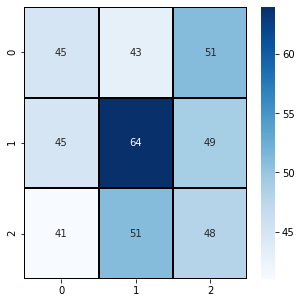

In [81]:
plt.figure(figsize = (5,5))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

### Modell evaluation 

Evaluate the model with a test dataset.

In [73]:
model.evaluate(test_ds)

21/21 [==============================] - 7s 335ms/step - loss: 0.1405 - accuracy: 0.9634


[0.14053627848625183, 0.9634146094322205]